In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as skl
import matplotlib.pylab as plt

In [2]:
train = pd.read_csv('train_technidus.csv')
test = pd.read_csv('test_technidus.csv')

# Data Pre-Processing

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7654 entries, 0 to 7653
Data columns (total 25 columns):
CustomerID              7654 non-null int64
Title                   49 non-null object
FirstName               7654 non-null object
MiddleName              4487 non-null object
LastName                7654 non-null object
Suffix                  0 non-null float64
AddressLine1            7654 non-null object
AddressLine2            123 non-null object
City                    7654 non-null object
StateProvinceName       7654 non-null object
CountryRegionName       7654 non-null object
PostalCode              7654 non-null object
PhoneNumber             7654 non-null object
BirthDate               7654 non-null object
Education               7654 non-null object
Occupation              7654 non-null object
Gender                  7654 non-null object
MaritalStatus           7654 non-null object
HomeOwnerFlag           7654 non-null int64
NumberCarsOwned         7654 non-null int64
N

In [4]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3340 entries, 0 to 3339
Data columns (total 25 columns):
CustomerID              3340 non-null int64
Title                   15 non-null object
FirstName               3340 non-null object
MiddleName              1883 non-null object
LastName                3340 non-null object
Suffix                  1 non-null object
AddressLine1            3340 non-null object
AddressLine2            60 non-null object
City                    3340 non-null object
StateProvinceName       3340 non-null object
CountryRegionName       3340 non-null object
PostalCode              3340 non-null object
PhoneNumber             3340 non-null object
BirthDate               3340 non-null object
Education               3340 non-null object
Occupation              3340 non-null object
Gender                  3340 non-null object
MaritalStatus           3340 non-null object
HomeOwnerFlag           3340 non-null int64
NumberCarsOwned         3340 non-null int64
Num

In [5]:
#Print out all the columns that have not more than 30% null values
nn_cols=[col for col in train.columns if train[col].count()>=0.7*len(train)]
print(nn_cols)

['CustomerID', 'FirstName', 'LastName', 'AddressLine1', 'City', 'StateProvinceName', 'CountryRegionName', 'PostalCode', 'PhoneNumber', 'BirthDate', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AveMonthSpend', 'BikeBuyer']


In [6]:
train=train[nn_cols]
test=test[nn_cols]

In [7]:
train.isnull().sum()

CustomerID              0
FirstName               0
LastName                0
AddressLine1            0
City                    0
StateProvinceName       0
CountryRegionName       0
PostalCode              0
PhoneNumber             0
BirthDate               0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
dtype: int64

In [8]:
test.isnull().sum()

CustomerID                 0
FirstName                  0
LastName                   0
AddressLine1               0
City                       0
StateProvinceName          0
CountryRegionName          0
PostalCode                 0
PhoneNumber                0
BirthDate                  0
Education                  0
Occupation                 0
Gender                     0
MaritalStatus              0
HomeOwnerFlag              0
NumberCarsOwned            0
NumberChildrenAtHome       0
TotalChildren              0
YearlyIncome               0
AveMonthSpend           3340
BikeBuyer                  0
dtype: int64

In [9]:
train.nunique()

CustomerID              7654
FirstName                612
LastName                 298
AddressLine1            6583
City                     252
StateProvinceName         46
CountryRegionName          6
PostalCode               304
PhoneNumber             3831
BirthDate               5168
Education                  5
Occupation                 5
Gender                     2
MaritalStatus              2
HomeOwnerFlag              2
NumberCarsOwned            5
NumberChildrenAtHome       6
TotalChildren              6
YearlyIncome            7449
AveMonthSpend            150
BikeBuyer                  2
dtype: int64

In [10]:
test.nunique()

CustomerID              3340
FirstName                583
LastName                 251
AddressLine1            3122
City                     237
StateProvinceName         38
CountryRegionName          6
PostalCode               286
PhoneNumber             1773
BirthDate               2766
Education                  5
Occupation                 5
Gender                     2
MaritalStatus              2
HomeOwnerFlag              2
NumberCarsOwned            5
NumberChildrenAtHome       6
TotalChildren              6
YearlyIncome            3306
AveMonthSpend              0
BikeBuyer                  2
dtype: int64

In [11]:
#Drop features that are unlikely to be informative
to_drop = ['FirstName','LastName','City','StateProvinceName','AddressLine1','PostalCode','PhoneNumber']

train.drop(to_drop,inplace=True,axis=1)
test.drop(to_drop,inplace=True,axis=1)

In [12]:
#Convert BirthDate to Year,Month
train['BirthYear']=pd.to_datetime(train['BirthDate']).dt.year;
train['BirthMonth']=pd.to_datetime(train['BirthDate']).dt.month;
train.drop(['BirthDate'],axis=1,inplace=True)

In [13]:
test['BirthYear']=pd.to_datetime(test['BirthDate']).dt.year;
test['BirthMonth']=pd.to_datetime(test['BirthDate']).dt.month;
test.drop(['BirthDate'],axis=1,inplace=True)

In [14]:
train.isnull().sum()

CustomerID              0
CountryRegionName       0
Education               0
Occupation              0
Gender                  0
MaritalStatus           0
HomeOwnerFlag           0
NumberCarsOwned         0
NumberChildrenAtHome    0
TotalChildren           0
YearlyIncome            0
AveMonthSpend           0
BikeBuyer               0
BirthYear               0
BirthMonth              0
dtype: int64

In [15]:
test.isnull().sum()

CustomerID                 0
CountryRegionName          0
Education                  0
Occupation                 0
Gender                     0
MaritalStatus              0
HomeOwnerFlag              0
NumberCarsOwned            0
NumberChildrenAtHome       0
TotalChildren              0
YearlyIncome               0
AveMonthSpend           3340
BikeBuyer                  0
BirthYear                  0
BirthMonth                 0
dtype: int64

In [16]:
train.nunique()

CustomerID              7654
CountryRegionName          6
Education                  5
Occupation                 5
Gender                     2
MaritalStatus              2
HomeOwnerFlag              2
NumberCarsOwned            5
NumberChildrenAtHome       6
TotalChildren              6
YearlyIncome            7449
AveMonthSpend            150
BikeBuyer                  2
BirthYear                 63
BirthMonth                12
dtype: int64

In [17]:
test.nunique()

CustomerID              3340
CountryRegionName          6
Education                  5
Occupation                 5
Gender                     2
MaritalStatus              2
HomeOwnerFlag              2
NumberCarsOwned            5
NumberChildrenAtHome       6
TotalChildren              6
YearlyIncome            3306
AveMonthSpend              0
BikeBuyer                  2
BirthYear                 54
BirthMonth                12
dtype: int64

In [18]:
train.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,BirthYear,BirthMonth
count,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000,7654.000000
mean,18784.735824,0.695192,1.581657,1.253201,2.161092,82289.196891,76.505357,0.498171,1962.095898,6.534492
std,4795.026146,0.460356,1.186209,1.659555,1.731424,40658.245901,29.465195,0.500029,10.539514,3.202157
min,11001.000000,0.000000,0.000000,0.000000,0.000000,10036.000000,22.000000,0.000000,1911.000000,1.000000
25%,14760.750000,0.000000,1.000000,0.000000,1.000000,50765.750000,53.000000,0.000000,1956.000000,4.000000
50%,18479.500000,1.000000,2.000000,0.000000,2.000000,82233.500000,72.000000,0.000000,1964.000000,7.000000
75%,22431.500000,1.000000,2.000000,2.000000,4.000000,109853.500000,89.000000,1.000000,1970.000000,9.000000
max,29481.000000,1.000000,4.000000,5.000000,5.000000,193721.000000,176.000000,1.000000,1980.000000,12.000000


In [19]:
test.describe()

,CustomerID,HomeOwnerFlag,NumberCarsOwned,NumberChildrenAtHome,TotalChildren,YearlyIncome,AveMonthSpend,BikeBuyer,BirthYear,BirthMonth
count,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,3340.000000,0.0,3340.000000,3340.000000,3340.000000
mean,23441.067964,0.625150,1.545509,1.182036,2.120958,81610.275150,NaN,0.495210,1962.069461,6.521856
std,5107.867886,0.484157,1.183150,1.632014,1.703996,40785.386595,NaN,0.500052,10.379875,3.264033
min,11026.000000,0.000000,0.000000,0.000000,0.000000,9482.000000,NaN,0.000000,1918.000000,1.000000
25%,20374.250000,0.000000,1.000000,0.000000,1.000000,49787.750000,NaN,0.000000,1955.000000,4.000000
50%,25180.500000,1.000000,2.000000,0.000000,2.000000,80868.500000,NaN,0.000000,1963.000000,6.000000
75%,27368.250000,1.000000,2.000000,2.000000,4.000000,109549.750000,NaN,1.000000,1970.000000,9.000000
max,29480.000000,1.000000,4.000000,5.000000,5.000000,194314.000000,NaN,1.000000,1980.000000,12.000000


In [20]:
cat_col=[col for col in train.columns if train[col].nunique()<7]
num_col=list(set([col for col in train.columns if train[col].nunique()>7])-set(['CustomerID']))

In [21]:
print('Categorical features are:',cat_col)
print('')
print('Numerical features are:',num_col)

Categorical features are: ['CountryRegionName', 'Education', 'Occupation', 'Gender', 'MaritalStatus', 'HomeOwnerFlag', 'NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'BikeBuyer']

Numerical features are: ['YearlyIncome', 'BirthYear', 'BirthMonth', 'AveMonthSpend']


# Exploratory Data Analysis

In [22]:
#Distribution of customers for each categorical variable
for col in cat_col:
    print(train[col].value_counts())
    print('')

United States     3176
Australia         1554
United Kingdom     822
France             745
Germany            717
Canada             640
Name: CountryRegionName, dtype: int64

Bachelors              2337
Partial College        2064
High School            1337
Graduate Degree        1316
Partial High School     600
Name: Education, dtype: int64

Professional      2489
Skilled Manual    1808
Management        1327
Clerical          1077
Manual             953
Name: Occupation, dtype: int64

M    3984
F    3670
Name: Gender, dtype: int64

M    3901
S    3753
Name: MaritalStatus, dtype: int64

1    5321
0    2333
Name: HomeOwnerFlag, dtype: int64

2    2530
1    1973
0    1677
3     823
4     651
Name: NumberCarsOwned, dtype: int64

0    4115
1     936
2     845
3     624
4     576
5     558
Name: NumberChildrenAtHome, dtype: int64

0    1847
2    1338
1    1332
4    1204
3     974
5     959
Name: TotalChildren, dtype: int64

0    3841
1    3813
Name: BikeBuyer, dtype: int64



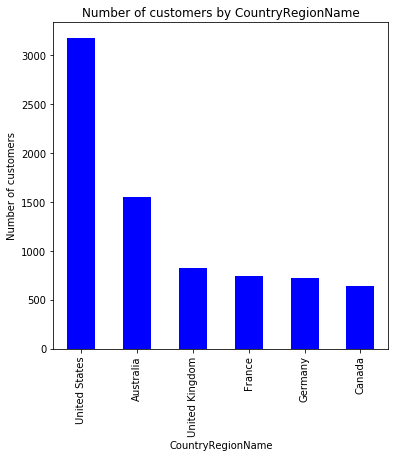

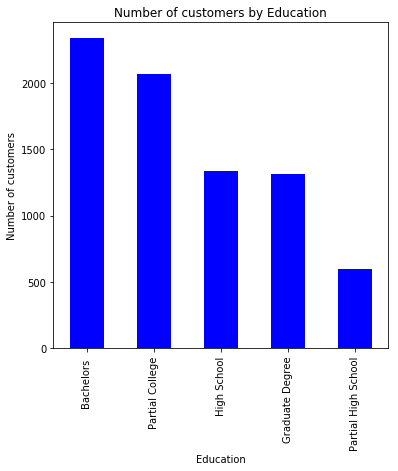

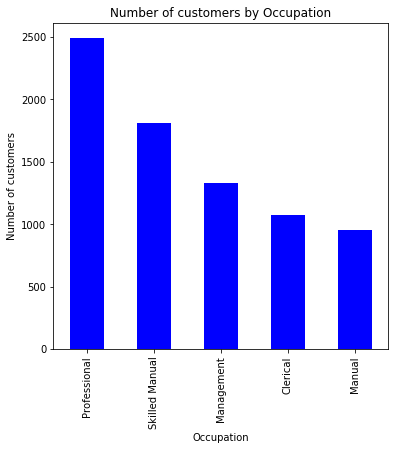

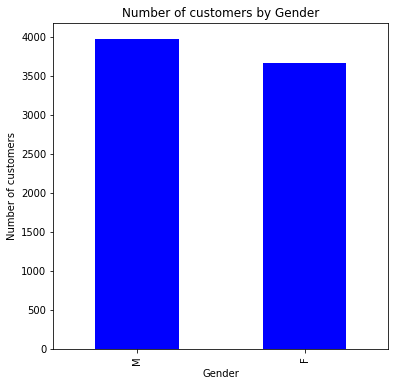

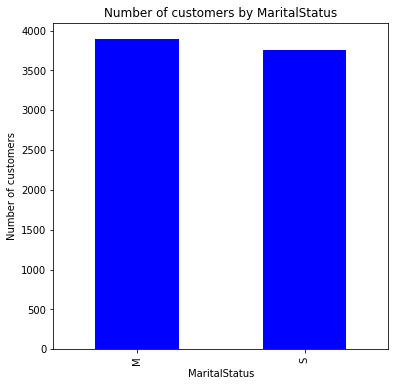

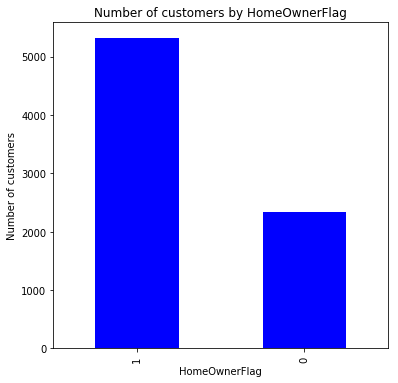

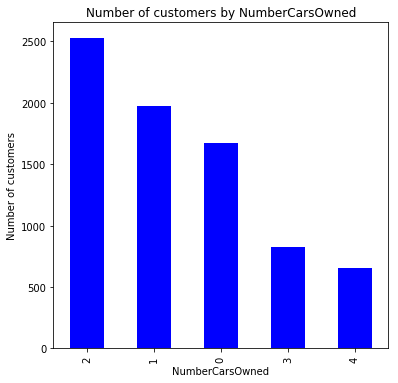

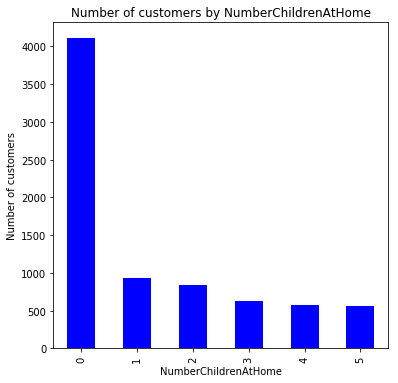

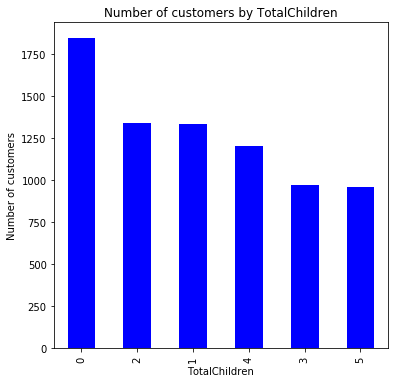

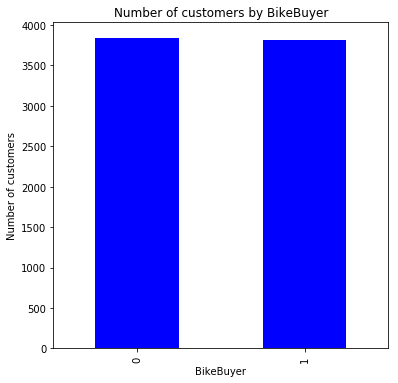

In [23]:
for col in cat_col:
        fig = plt.figure(figsize=(6,6))
        ax = fig.gca()   
        counts = train[col].value_counts()
        counts.plot.bar(ax = ax, color = 'blue') 
        ax.set_title('Number of customers by ' + col)
        ax.set_xlabel(col) 
        ax.set_ylabel('Number of customers')
        plt.show()

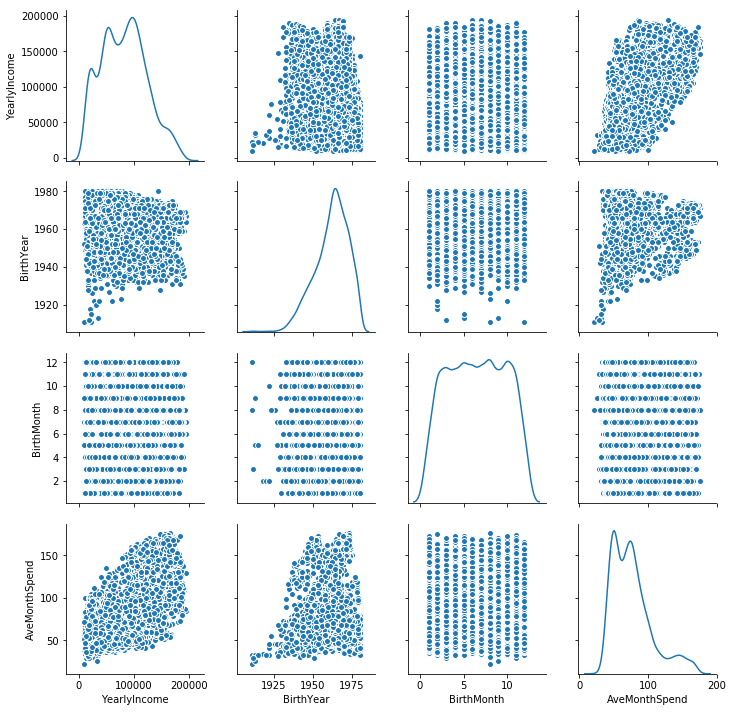

In [24]:
sns.pairplot(train[num_col],diag_kind='kde')

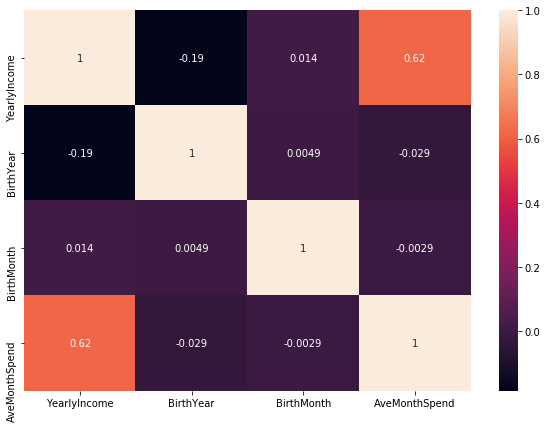

In [25]:
 plt.figure(figsize=(10,7))
sns.heatmap(train[num_col].corr(),annot=True)

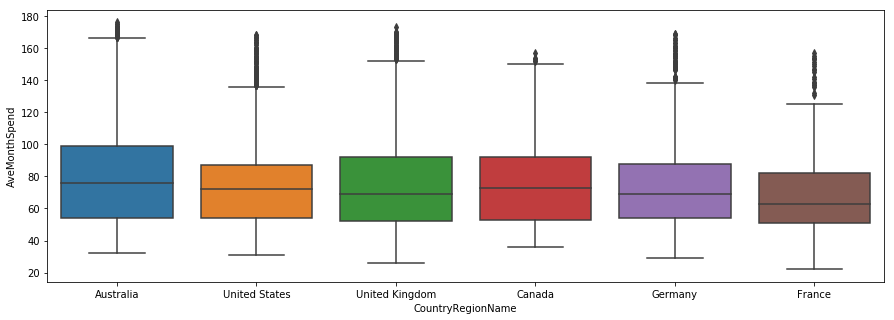

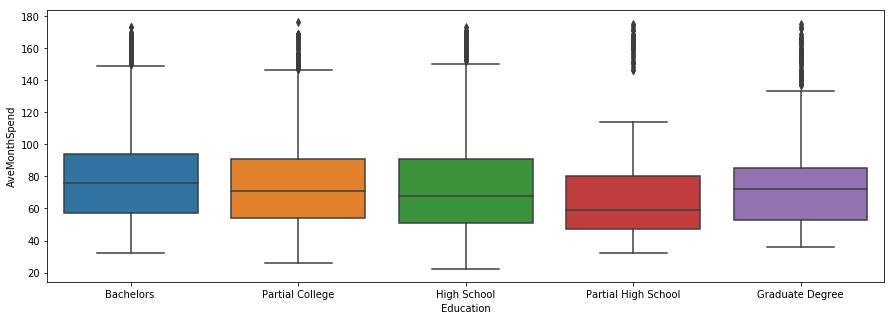

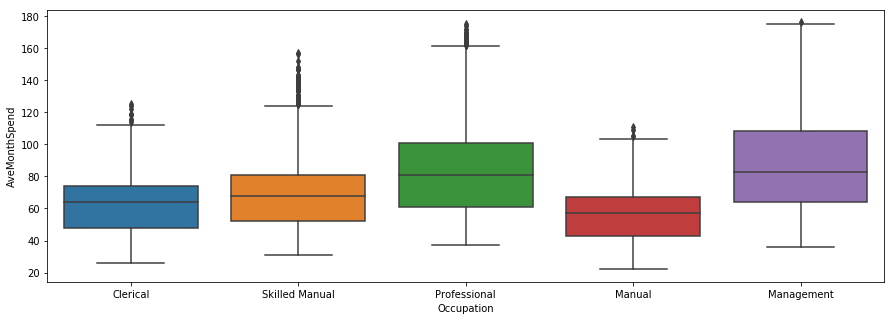

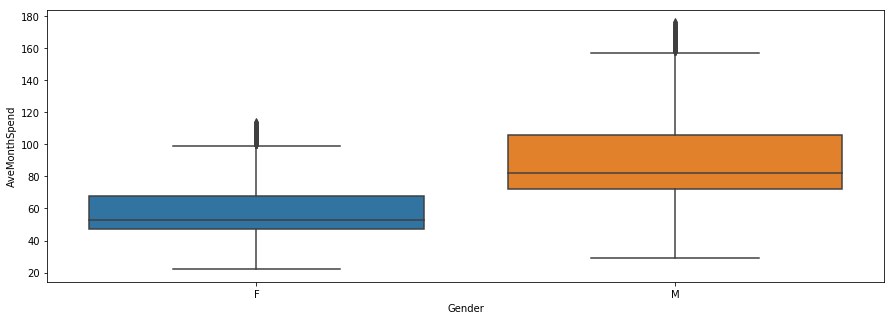

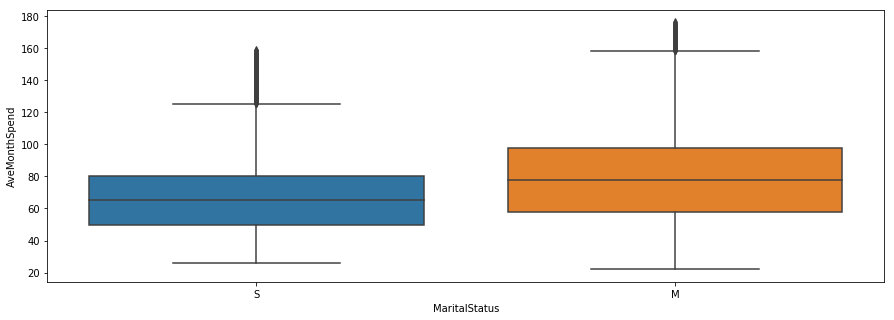

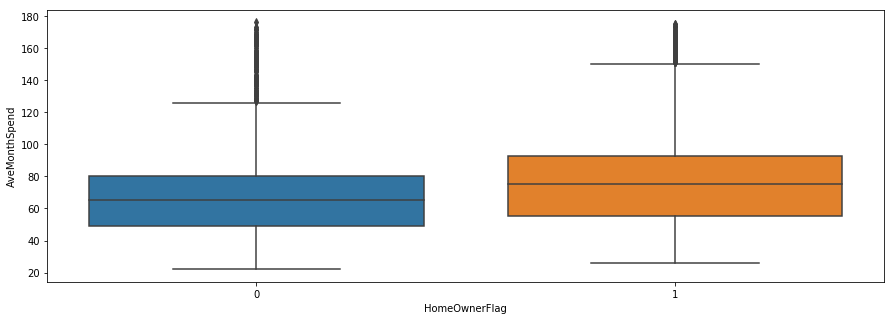

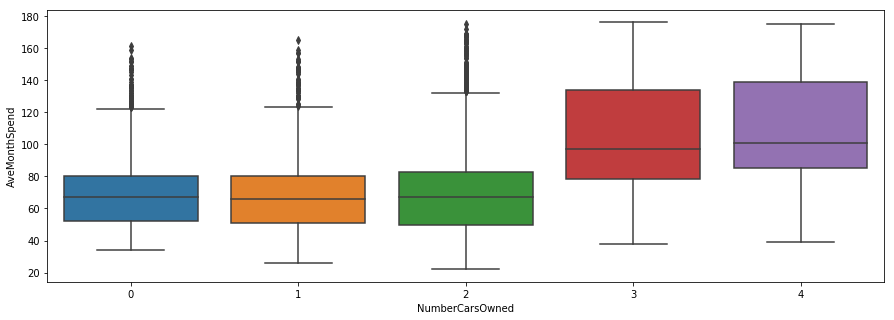

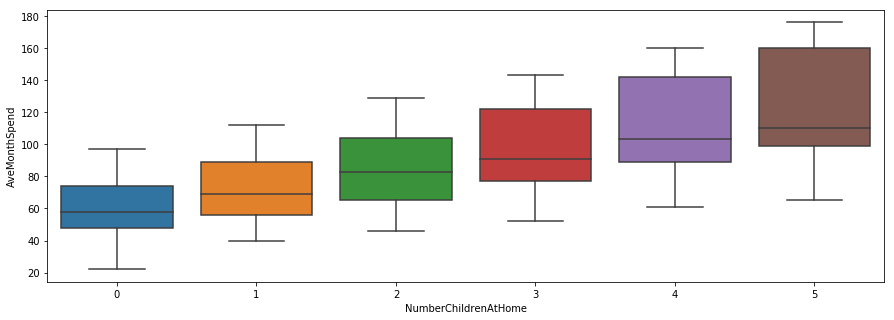

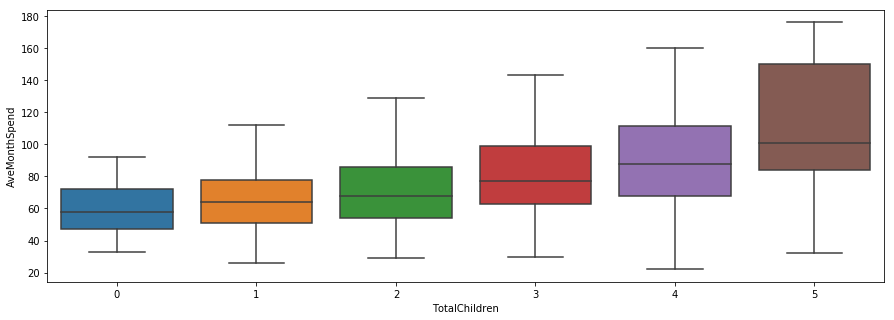

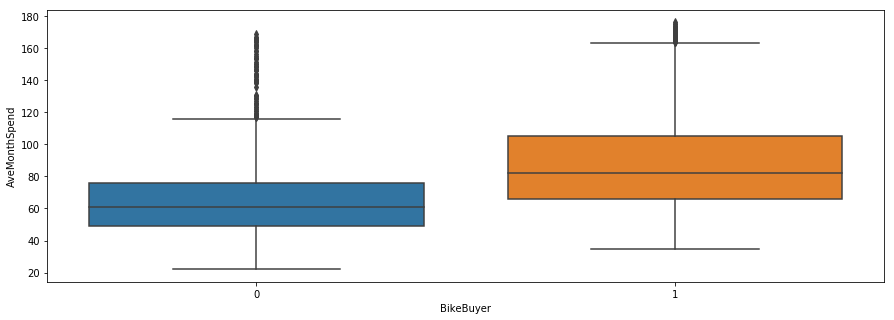

In [26]:
#Checking the effect of each categorical varaible on the target
def plot_box(data, cols, col_y = None):
    for col in cols:
        plt.figure(figsize=(15,5))
        sns.boxplot(y=col_y, x=col, data=data)
        plt.ylabel(col_y) # Set text for the x axis
        plt.xlabel(col)# Set text for y axis
        plt.show()
        
plot_box(data=train,cols=cat_col,col_y='AveMonthSpend')

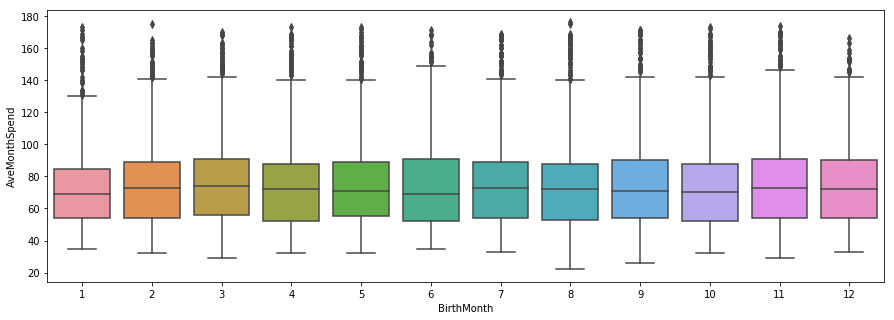

In [27]:
#Checking if BirthMonth can be a categorical variable
plot_box(data=train,cols=['BirthMonth'],col_y='AveMonthSpend')

Since birth year has no correlation with average monthly spend, I decided to bin the birth year into ten and test if this would have any correlation as a categorical variable on the target

In [28]:
join=train.append(test)

In [29]:
join['binned_year']=pd.cut(join['BirthYear'],10,labels=[0,1,2,3,4,5,6,7,8,9])

In [30]:
train['binned_year']=join['binned_year'][0:7654]
test['binned_year']=join['binned_year'][7654:]

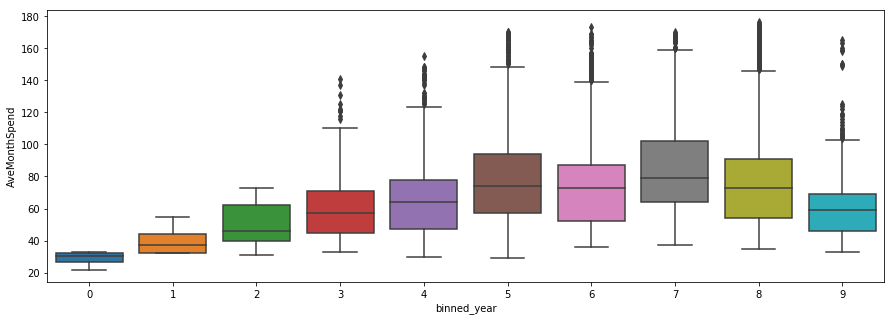

In [31]:
plot_box(data=train,cols=['binned_year'],col_y='AveMonthSpend')

# EDA Key Summary

- Looking at the numerical variables, only yearly income correlates with the target
- Looking at the categorical variables, all of them seem to be useful in predicting the target.
- Only Country Region, Education, Occupation, Marital Status and Gender should be encoded. The other categorical variables seem to show some level of ordinality thus they should be used as such.
- Birth month does not seem to be a useful feature for predicting the target variable
- Binned Year seems to be an ordinal categorical variable though the relationship with the target doesn't seem to be entirely linear.